# Proyecto_5

### Diseñar experimento

#### Formulando Hipótesis

En la hipótesis nula, el usuario tiene más facilidad para comprar en la página original.

La hipótesis alternativa indica que el usuario tiene mayor o menor facilidad para comprar en la página editada.

$$H_0: p = p_0$$
$$H_1: p \ne p_0$$



**Grupo de control**: Página original

**Grupo de Tratamiento**: Página con cambios





**Cambios realizados:**
    
    - Estrechar banner
    
    - Llenar Home de categorías para facilitar la busqueda de productos
    
    - Botón de busqueda

### Instalar librerías

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta 

### Obtener y preparar datos

In [2]:
data=pd.read_csv('../data/Datos_recopilados.csv',sep=';')
data.head()

,userid,version,time,page,compra,genero,edad
0,c1,control,238,old_page,0,M,26
1,c2,control,393,old_page,1,F,18
2,c3,control,168,old_page,1,M,54
3,c4,control,327,old_page,0,F,21
4,c5,control,115,old_page,0,F,69


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userid   40 non-null     object
 1   version  40 non-null     object
 2   time     40 non-null     int64 
 3   page     40 non-null     object
 4   compra   40 non-null     int64 
 5   genero   40 non-null     object
 6   edad     40 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 2.3+ KB


In [4]:
pd.crosstab(data.version, data.page)

page,new_page,old_page
version,,
control,0,20
tratamiento,20,0


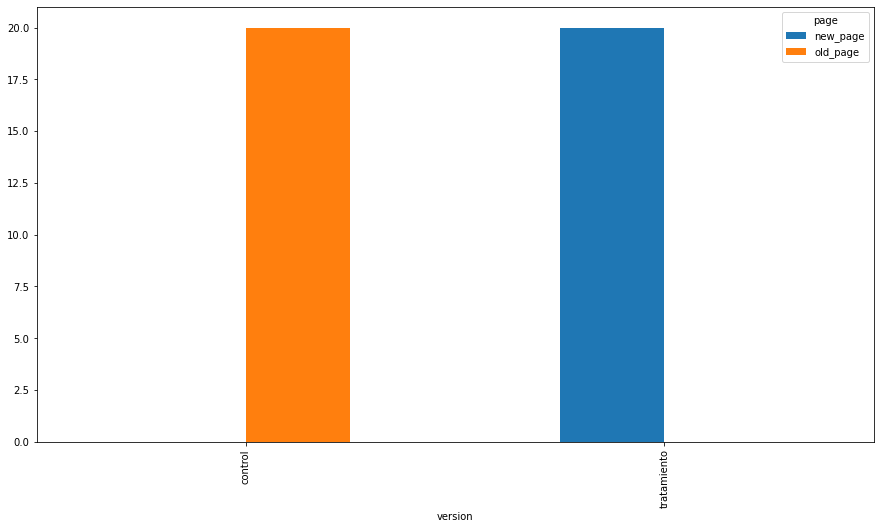

In [5]:
pd.crosstab(data.version, data.page).plot(kind='bar');

### AB Testing Bayesiano 

In [6]:
data[data['version']=='control'].compra.value_counts()

1    14
0     6
Name: compra, dtype: int64

In [7]:
imps_ctrl = len(data[data['version']=='control'])
convs_ctrl = data[data['version']=='control'].compra.value_counts()[1]
imps_test=len(data[data['version']=='tratamiento'])
convs_test= data[data['version']=='tratamiento'].compra.value_counts()[1]

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.7, Test=0.75'

In [8]:
# a prioris, las betas

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [9]:
beta_control.mean(), beta_test.mean()

(0.6818181818181818, 0.7272727272727273)

In [18]:
x=np.linspace(0, 1, 100)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

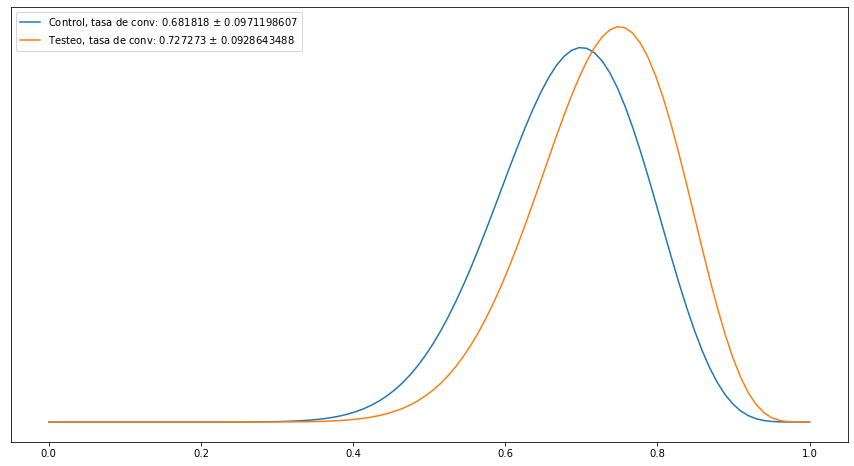

In [19]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [21]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

0.06666666666666678

In [22]:
!pip install mpmath

In [35]:
from mpmath import betainc   # integral de beta

prob=betainc(a_T, b_T, , 1, regularized=True)

prob=float(prob)

prob

0.0

In [32]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un 6.67%, con una probabilidad del 100.00%'